# Big Mart Sales Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. A predictive model and predict the sales of each product at a particular outlet using Linear Regression

## Importing the Library

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Importing the datasets

In [64]:
df_train = pd.read_csv('/Users/Apple/Desktop/PROJECTS/Big Mart Sales Prediction/train_Big_Mart_Sales_Prediction.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
df_test = pd.read_csv('/Users/Apple/Desktop/PROJECTS/Big Mart Sales Prediction/test_Big_Mart_Sales_Prediction.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [41]:
submission_df = pd.read_csv('/Users/Apple/Desktop/PROJECTS/Big Mart Sales Prediction/sample_submission_8RXa3c6.csv')
submission_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


## Data Cleaning

### Examining the Data

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [43]:
numerical_col = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in categorical_col:
    print(df_train[i].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### Check for Duplicates

In [44]:
df_train.duplicated().sum()

0

In [45]:
df_test.duplicated().sum()

0

### Checking for Null Values

In [46]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Replacing Null Values

In [47]:
df_train['Item_Weight'] =df_train['Item_Weight'].replace(np.nan, np.mean(df_train['Item_Weight']))
df_train['Outlet_Size'] = df_train['Outlet_Size'].replace(np.nan, 'Very High')
df_test['Item_Weight'] =df_test['Item_Weight'].replace(np.nan, np.mean(df_test['Item_Weight']))
df_test['Outlet_Size'] = df_test['Outlet_Size'].replace(np.nan, 'Very High')

In [48]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Replacing text values with numerical values

In [49]:
categorical_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [50]:
Item_Fat_Content = {}
Item_Type = {}
Outlet_Size = {}
Outlet_Location_Type = {}
Outlet_Type = {}

col_cat = [Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type]

for i in range(len(categorical_col)):
    typ = df_train[categorical_col[i]].unique()
    for j in range(len(typ)):
        col_cat[i][typ[j]] = j
    df_train[categorical_col[i]] = df_train[categorical_col[i]].map(col_cat[i])

for i in range(len(categorical_col)):
    typ = df_test[categorical_col[i]].unique()
    for j in range(len(typ)):
        col_cat[i][typ[j]] = j
    df_test[categorical_col[i]] = df_test[categorical_col[i]].map(col_cat[i])

df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,0,249.8092,OUT049,1999,0,0,0,3735.1380
1,DRC01,5.920,1,0.019278,1,48.2692,OUT018,2009,0,1,1,443.4228
2,FDN15,17.500,0,0.016760,2,141.6180,OUT049,1999,0,0,0,2097.2700
3,FDX07,19.200,1,0.000000,3,182.0950,OUT010,1998,1,1,2,732.3800
4,NCD19,8.930,0,0.000000,4,53.8614,OUT013,1987,2,1,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,6,214.5218,OUT013,1987,2,1,0,2778.3834
8519,FDS36,8.380,1,0.046982,5,108.1570,OUT045,2002,1,2,0,549.2850
8520,NCJ29,10.600,0,0.035186,9,85.1224,OUT035,2004,3,2,0,1193.1136
8521,FDN46,7.210,1,0.145221,6,103.1332,OUT018,2009,0,1,1,1845.5976


### Feature Selection

In [51]:
features = numerical_col + categorical_col
train_features = df_train[features]
test_features = df_test[features]
train_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,1,1,0,1,1
2,17.500,0.016760,141.6180,1999,0,2,0,0,0
3,19.200,0.000000,182.0950,1998,1,3,1,1,2
4,8.930,0.000000,53.8614,1987,0,4,2,1,0
...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,6,2,1,0
8519,8.380,0.046982,108.1570,2002,1,5,1,2,0
8520,10.600,0.035186,85.1224,2004,0,9,3,2,0
8521,7.210,0.145221,103.1332,2009,1,6,0,1,1


In [52]:
labels = df_train[['Item_Outlet_Sales']]
labels

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


## Exploratory Data Analysis

### Visualize Features

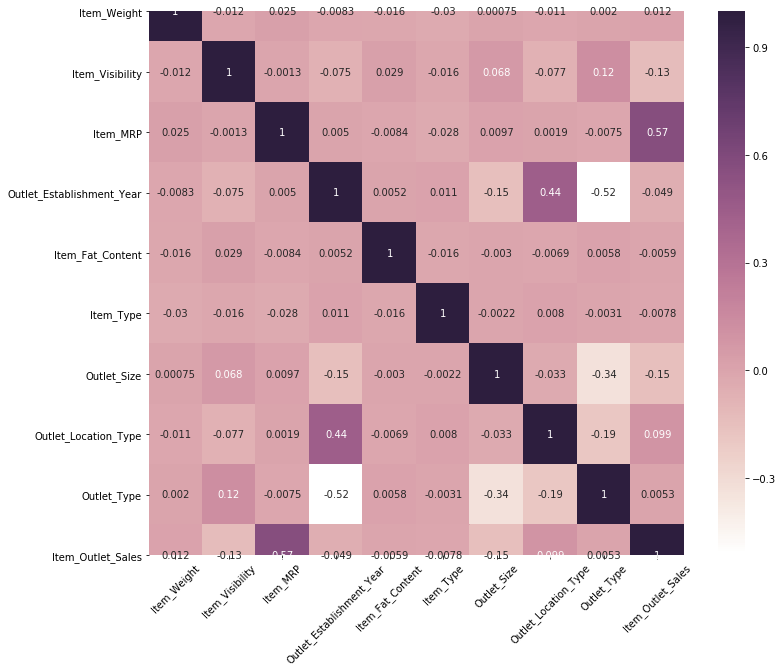

In [53]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df_train[features + ['Item_Outlet_Sales']].corr(), cmap = sns.cubehelix_palette(light=1, as_cmap=True), annot=True)
plt.xticks(rotation=45)
plt.show()

The Item_MRP feature is most strongly correlated with the Item_Outlet_Sales.

### Visualize target variable

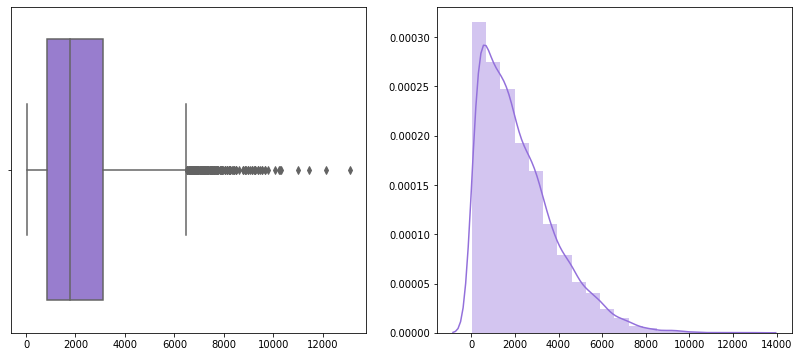

In [54]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(labels, color = 'mediumpurple')
plt.subplot(1,2,2)
sns.distplot(labels, bins=20, color = 'mediumpurple')
plt.show()

### Use IQR to identify potential outliers

In [62]:
stat = df_train['Item_Outlet_Sales'].describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers is {} and {}.'.format(upper,lower))

count    8337.000000
mean     2059.362844
std      1506.099754
min        33.290000
25%       810.944400
50%      1747.059200
75%      2998.097400
max      6478.234000
Name: Item_Outlet_Sales, dtype: float64
The upper and lower bounds for suspected outliers is 6278.8269 and -2469.7851000000005.


### Examine potential outliers

In [56]:
outliers = df_train[df_train['Item_Outlet_Sales'] > 6502]
outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350000,0,0.069103,11,259.9278,OUT018,2009,0,1,1,6768.5228
130,FDY25,12.857645,0,0.033810,11,180.5976,OUT027,1985,0,1,3,7968.2944
132,NCR53,12.857645,0,0.144338,9,224.4404,OUT027,1985,0,1,3,6976.2524
145,FDP16,18.600000,0,0.039356,7,246.3802,OUT049,1999,0,0,0,7370.4060
203,FDI24,12.857645,0,0.078362,5,177.9370,OUT027,1985,0,1,3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.200000,0,0.035967,3,260.3278,OUT049,1999,0,0,0,7549.5062
8329,NCQ06,12.857645,0,0.041622,4,253.6014,OUT027,1985,0,1,3,6630.0364
8350,NCE18,10.000000,0,0.021421,4,248.3750,OUT035,2004,3,2,0,7240.5750
8447,FDS26,20.350000,0,0.089975,0,261.6594,OUT017,2007,1,2,0,7588.1226


### Removal of Outliers

In [57]:
df_train = df_train[df_train['Item_Outlet_Sales'] < 6502]
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,0,249.8092,OUT049,1999,0,0,0,3735.1380
1,DRC01,5.920,1,0.019278,1,48.2692,OUT018,2009,0,1,1,443.4228
2,FDN15,17.500,0,0.016760,2,141.6180,OUT049,1999,0,0,0,2097.2700
3,FDX07,19.200,1,0.000000,3,182.0950,OUT010,1998,1,1,2,732.3800
4,NCD19,8.930,0,0.000000,4,53.8614,OUT013,1987,2,1,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,6,214.5218,OUT013,1987,2,1,0,2778.3834
8519,FDS36,8.380,1,0.046982,5,108.1570,OUT045,2002,1,2,0,549.2850
8520,NCJ29,10.600,0,0.035186,9,85.1224,OUT035,2004,3,2,0,1193.1136
8521,FDN46,7.210,1,0.145221,6,103.1332,OUT018,2009,0,1,1,1845.5976


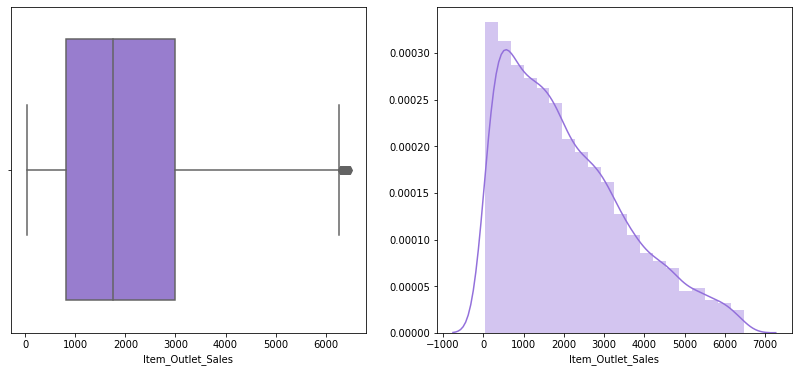

In [58]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df_train['Item_Outlet_Sales'], color = 'mediumpurple')
plt.subplot(1,2,2)
sns.distplot(df_train['Item_Outlet_Sales'], bins=20, color = 'mediumpurple')
plt.show()

## Training the Model

In [59]:
train_features= df_train.drop(columns = ['Item_Outlet_Sales'])
features = numerical_col + categorical_col
x = train_features[features]
y = df_train['Item_Outlet_Sales']
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing the Model

In [60]:
predict = df_test
predict['Item_Outlet_Sales'] = model.predict(test_features)
predict.to_csv('submission.csv', index = False)
predict

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,0,0.007565,0,107.8622,OUT049,1999,0,0,0,1983.117713
1,FDW14,8.300000,1,0.038428,1,87.3198,OUT017,2007,1,1,0,1325.663205
2,NCN55,14.600000,0,0.099575,2,241.7538,OUT010,1998,1,2,1,3619.263096
3,FDQ58,7.315000,0,0.015388,0,155.0340,OUT017,2007,1,1,0,2290.032379
4,FDY38,12.695633,2,0.118599,1,234.2300,OUT027,1985,0,2,2,4026.351906
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,0,141.3154,OUT046,1997,2,0,0,1968.862760
5677,FDD47,7.600000,2,0.142991,14,169.1448,OUT018,2009,0,2,3,1883.523529
5678,NCO17,10.000000,0,0.073529,5,118.7440,OUT045,2002,1,1,0,1868.461996
5679,FDJ26,15.300000,2,0.000000,13,214.6218,OUT017,2007,1,1,0,3276.337778


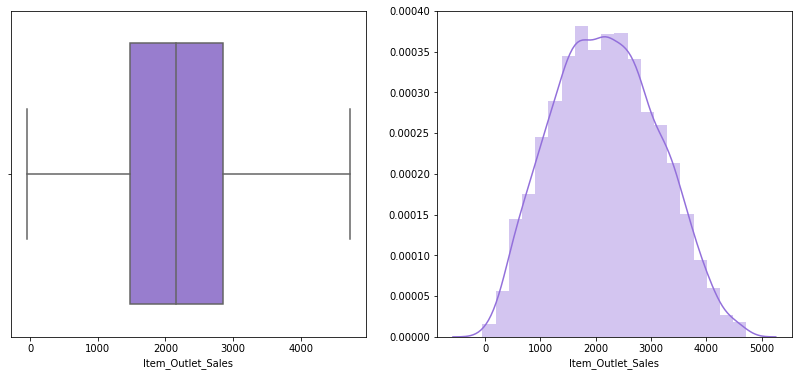

In [61]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(predict['Item_Outlet_Sales'],color = 'mediumpurple')
plt.subplot(1,2,2)
sns.distplot(predict['Item_Outlet_Sales'], bins=20, color = 'mediumpurple')
plt.show()